# EDA Project  - Analysis of AMCAT Data

# Objective:
+ The objective of this dataset is to analyze the employment outcomes of engineering graduates based on various factors, including demographic information, academic performance, cognitive, technical, and personality skills. 
+ The goal is to understand how these factors influence key employment outcomes such as salary, job titles, and job locations.

# Description of Dataset :
+ The dataset is provided by Aspiring Minds, originating from the Aspiring Minds Employment Outcome 2015 (AMEO) study.
+ The study focuses exclusively on engineering graduates.

# Dataset Size:
+ Independent Variables: Around `39` features, both continuous and categorical.
+ Data Points: Approximately `3998` entries.
+ The dataset contains a unique identifier for each candidate.
# Dependent Variables:
+ Salary: Annual CTC offered (Continuous)
+ Job Titles: Designation offered (Categorical)
+ Job Locations: City of the job (Categorical)
# Independent Variables:
+ Demographic Features:
+ Gender: Candidate’s gender (Categorical)
+ DOB: Date of birth
+ College Info: College ID, College Tier, College City, College GPA, State
# Academic Performance:
+ 10th Percentage: Marks in grade 10
+ 12th Percentage: Marks in grade 12
+ College GPA: Graduation GPA
+ Degree: Degree obtained
+ Specialization: Field of study
# Cognitive and Technical Skills (AMCAT Scores):
+ English: AMCAT English score
+ Logical: AMCAT Logical reasoning score
+ Quantitative: AMCAT Quant score
+ Domain-specific Scores: For subjects like Computer Science, Mechanical Engineering, etc.
+ Computer Programming: AMCAT programming score
# Personality Traits (AMCAT Personality Test):
+ Conscientiousness, Agreeableness, Extraversion, Neuroticism, Openness to Experience
# Date Variables:
+ DOJ: Date of joining
+ DOL: Date of leaving
+ Graduation Year: Year of graduation (Bachelor's)
# Types of Variables:
+ Continuous: Salary, GPA, 10th/12th percentage, AMCAT scores, personality test scores
+ Categorical: Gender, Job City, Degree, Specialization, College Tier
+ Date Variables: Date of joining/leaving, Date of birth, Graduation y


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [26]:
df= pd.read_csv(r"C:\Users\Veena\Downloads\data.xlsx - Sheet1.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [27]:
df.shape

(3998, 39)

In [28]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [30]:
df = df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
# Convert columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,NaT,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,NaT,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,NaT,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,NaT,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    2123 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

In [7]:
df.describe()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# Univariate Analysis

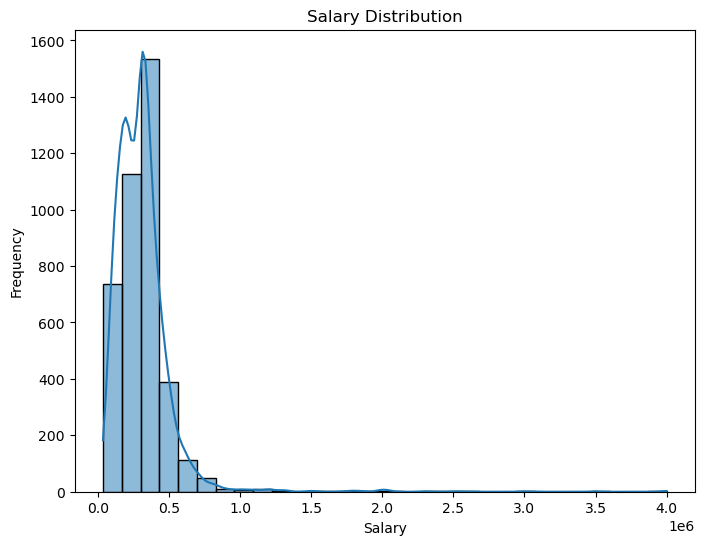

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


+ In the above histplot is observed that ranges between 0.0 to lL only

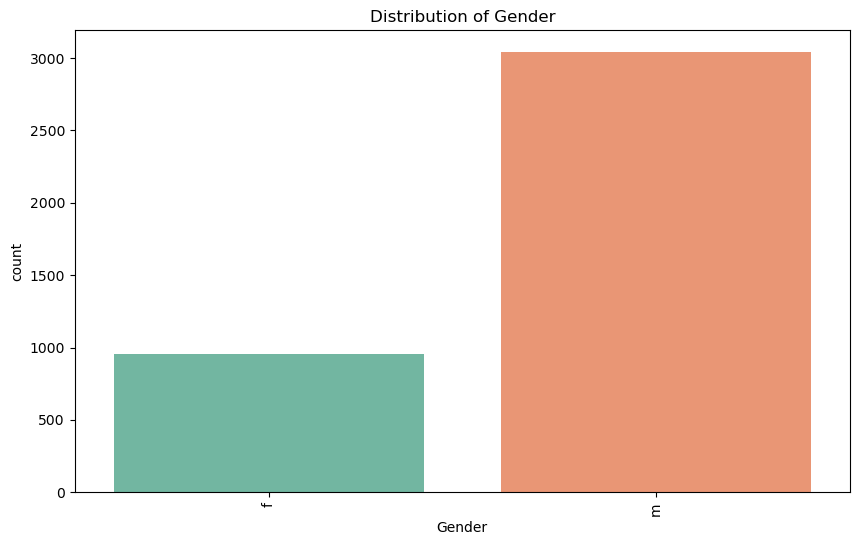

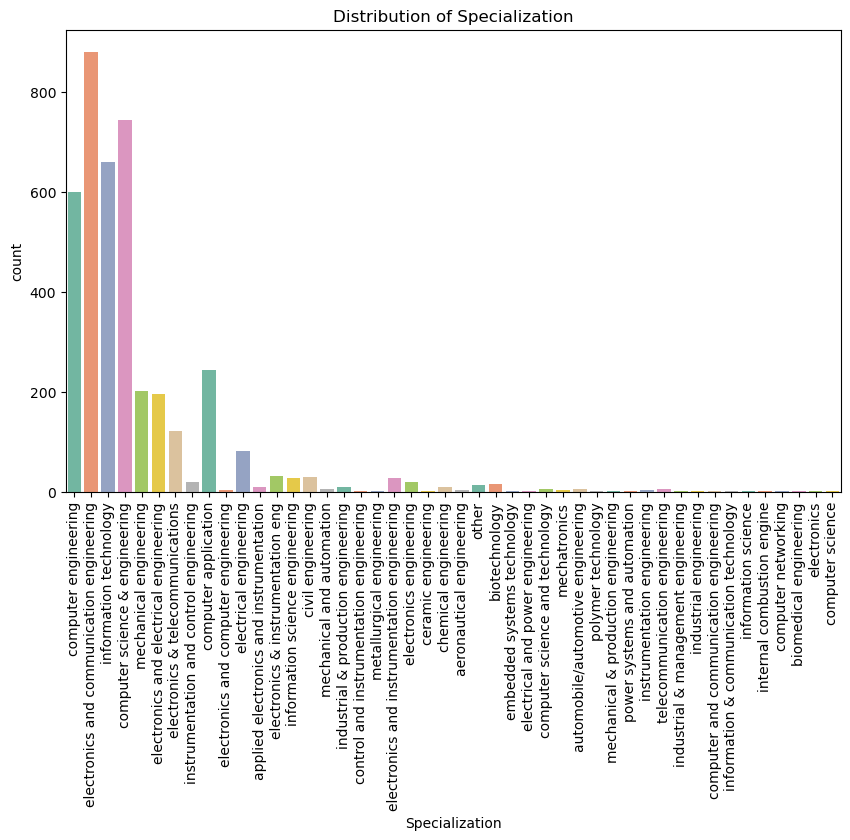

In [9]:
# Plotting a bar plot for categorical columns
categorical_columns = [ 'Gender', 'Specialization', ]
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()



+ In the above bar plot gender distbution it is obeseverd that Male is twice that female gender
+ in specialization plot it is observed that `Electronic and communication engineering ` 4 times high when compare with other and and 2nd highest is computer science engineering

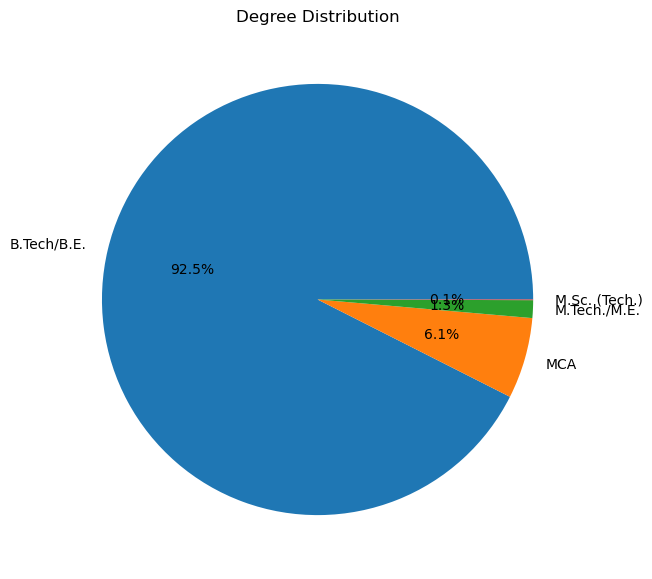

In [10]:
df['Degree'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7, 7))
plt.title('Degree Distribution')
plt.ylabel('')
plt.show()


+ In the above pie plot is obeserved that majority of graduates are from B.Tech/B.E with 92.5% and M.sc are less with 0.1%

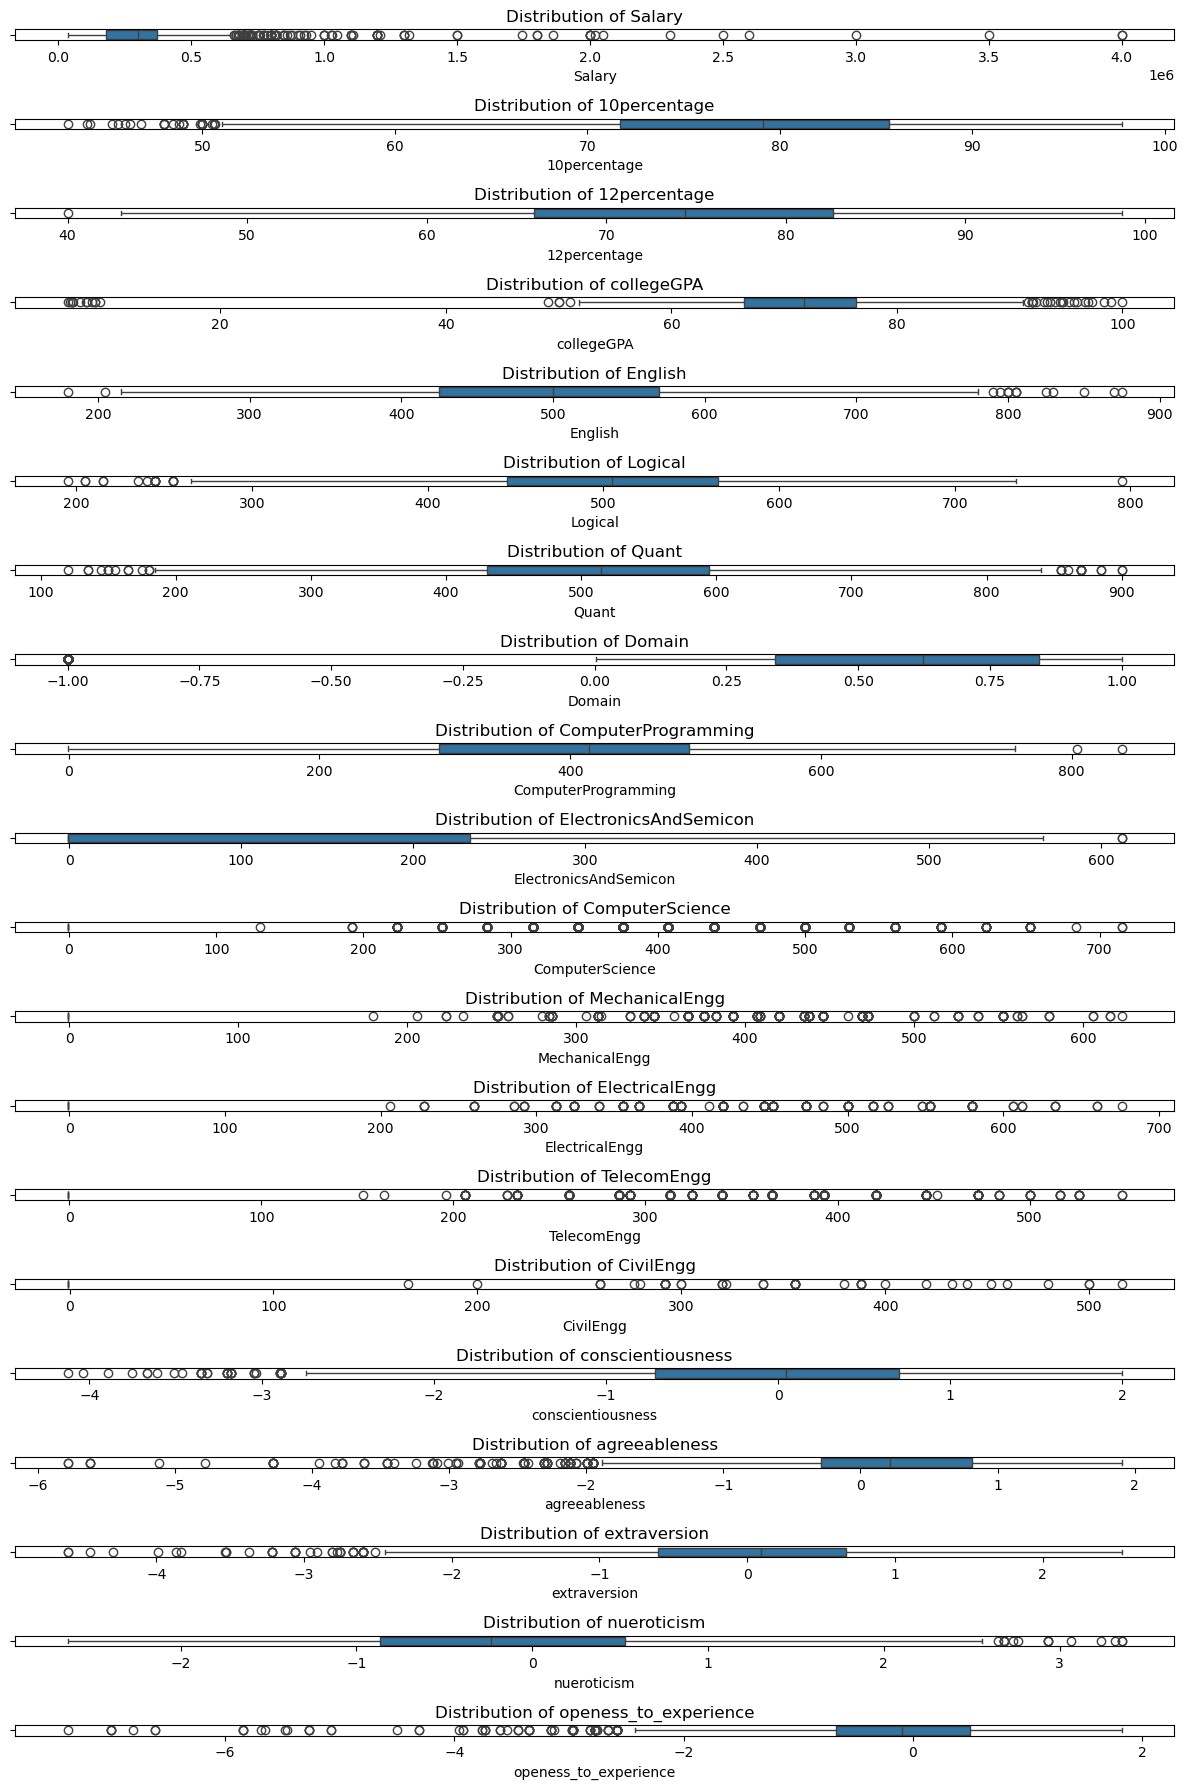

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous columns to visualize
continuous_columns = [
    'Salary',
    '10percentage',
    '12percentage',
    'collegeGPA',
    'English',
    'Logical',
    'Quant',
    'Domain',
    'ComputerProgramming',
    'ElectronicsAndSemicon',
    'ComputerScience',
    'MechanicalEngg',
    'ElectricalEngg',
    'TelecomEngg',
    'CivilEngg',
    'conscientiousness',
    'agreeableness',
    'extraversion',
    'nueroticism',
    'openess_to_experience'
]

# Set up the matplotlib figure
plt.figure(figsize=(12, 18))

# Create a box plot for each continuous column
for i, column in enumerate(continuous_columns):
    plt.subplot(len(continuous_columns), 1, i + 1)  # Adjust the subplot dimensions as needed
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


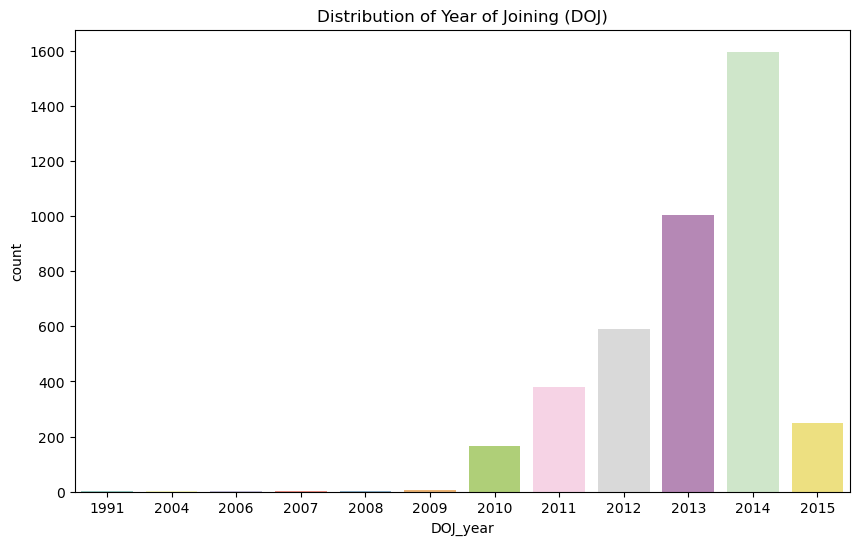

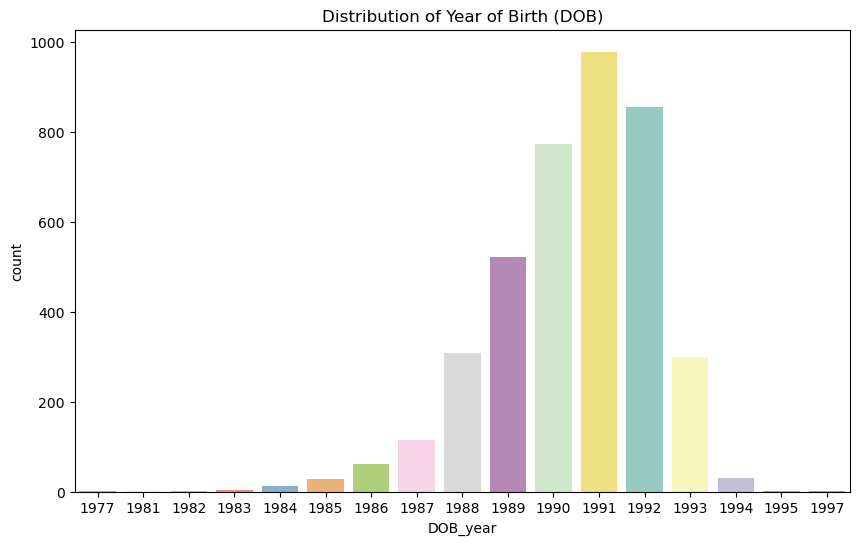

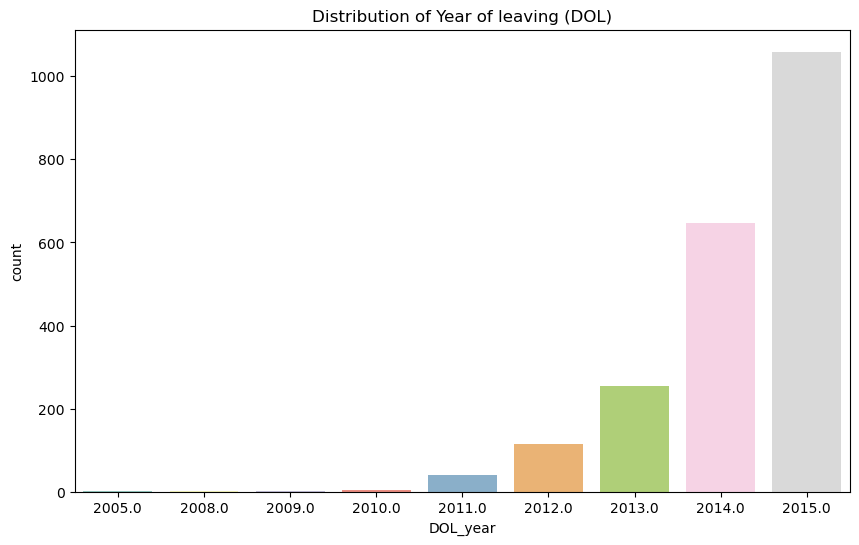

In [34]:
# Extract the year and plot
df['DOJ_year'] = df['DOJ'].dt.year
df['DOB_year'] = df['DOB'].dt.year
df['DOL_year'] = df['DOL'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(x=df['DOJ_year'], palette='Set3')
plt.title('Distribution of Year of Joining (DOJ)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['DOB_year'], palette='Set3')
plt.title('Distribution of Year of Birth (DOB)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['DOL_year'], palette='Set3')
plt.title('Distribution of Year of leaving (DOL)')
plt.show()


+ Date of join is very high in 2014 
+ Data of leaving is very high in 2015 

# Bivariate Analysis:

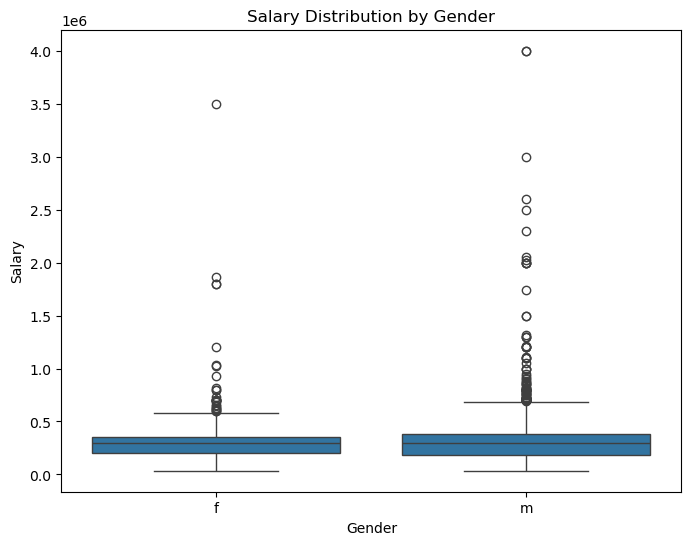

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()


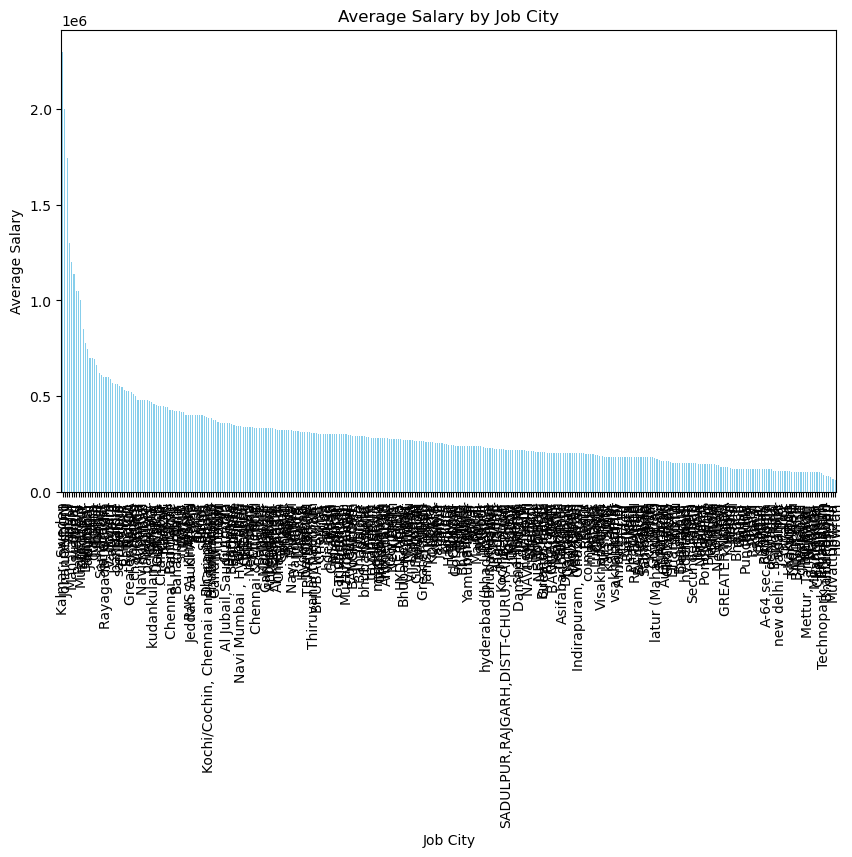

In [14]:
plt.figure(figsize=(10, 6))
city_salary = df.groupby('JobCity')['Salary'].mean().sort_values(ascending=False)
city_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Job City')
plt.xlabel('Job City')
plt.ylabel('Average Salary')
plt.show()


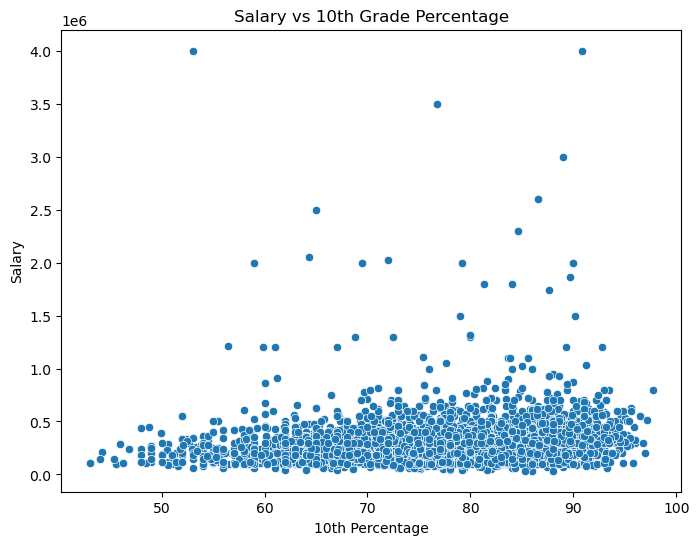

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='10percentage', y='Salary', data=df)
plt.title('Salary vs 10th Grade Percentage')
plt.xlabel('10th Percentage')
plt.ylabel('Salary')
plt.show()


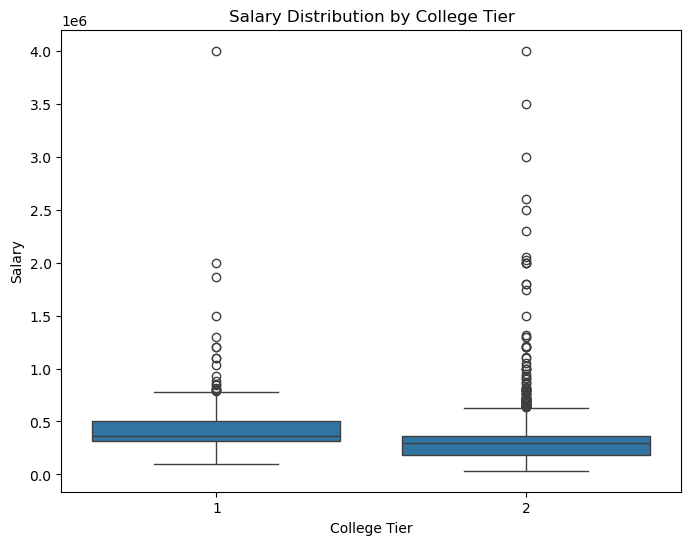

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CollegeTier', y='Salary', data=df)
plt.title('Salary Distribution by College Tier')
plt.xlabel('College Tier')
plt.ylabel('Salary')
plt.show()


# Multivariate Analysis

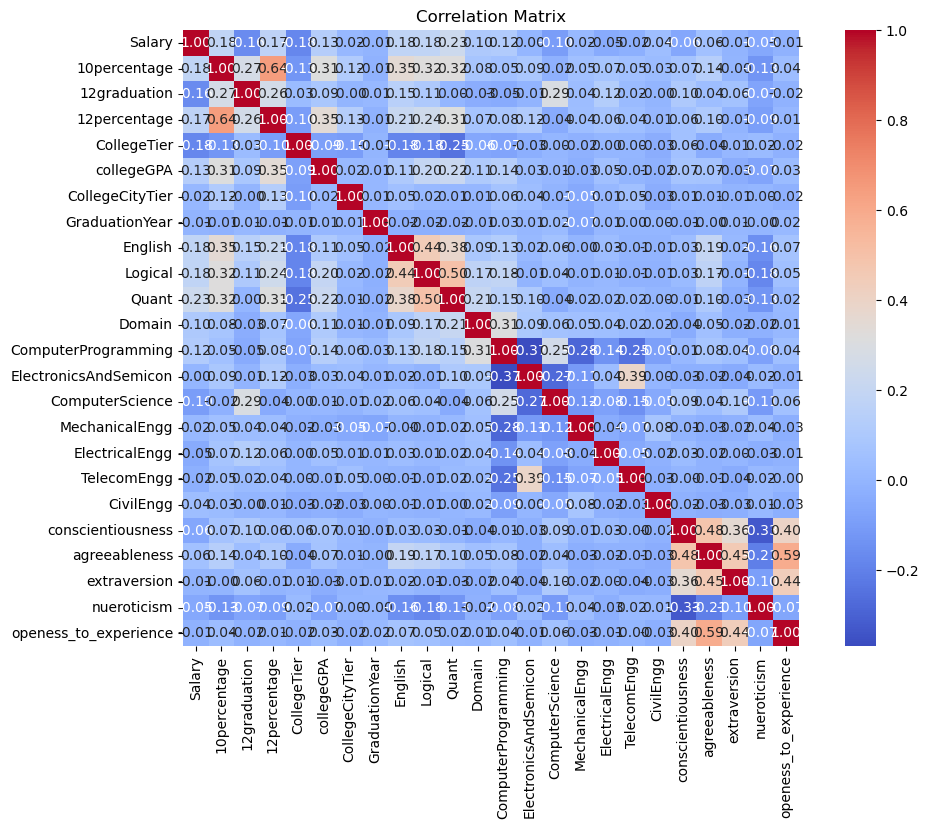

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with NaN values
numeric_df = numeric_df.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


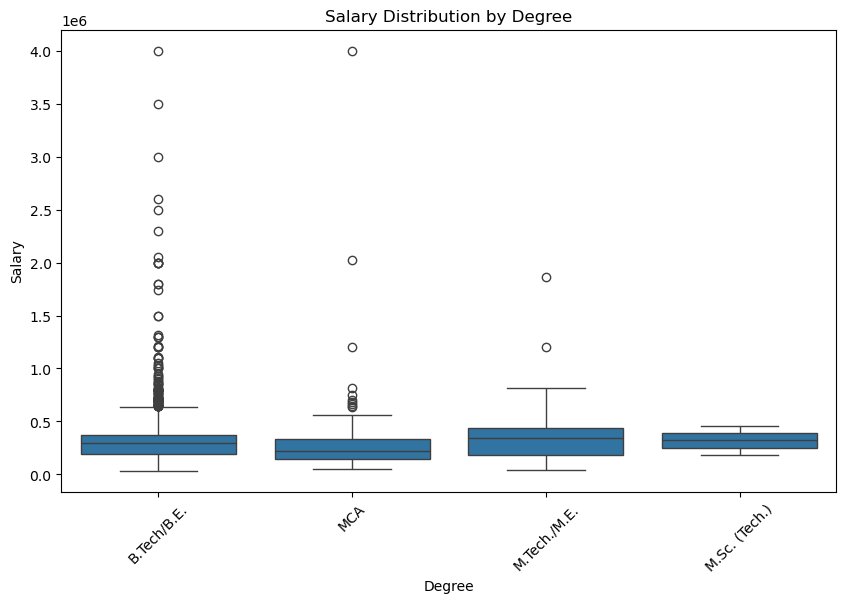

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=df)
plt.title('Salary Distribution by Degree')
plt.xticks(rotation=45)
plt.show()


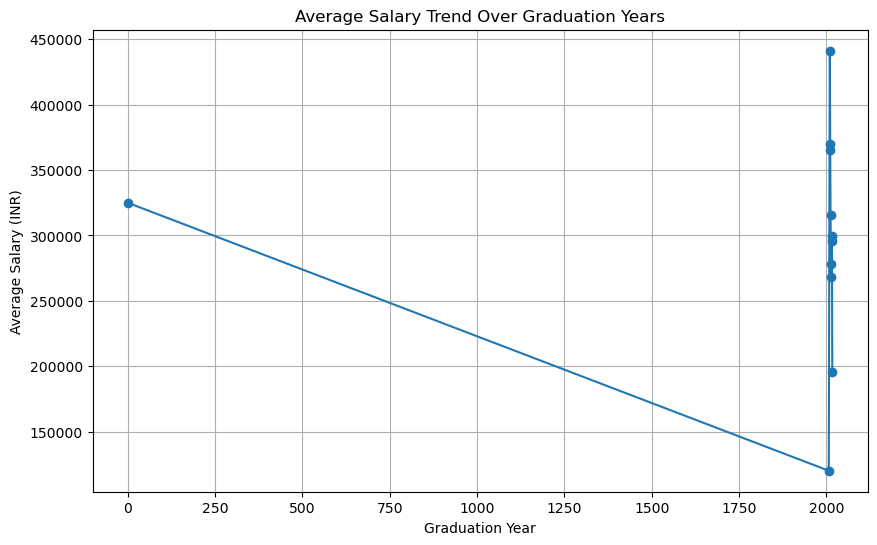

In [19]:
salary_trend = df.groupby('GraduationYear')['Salary'].mean()
salary_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Salary Trend Over Graduation Years')
plt.ylabel('Average Salary (INR)')
plt.xlabel('Graduation Year')
plt.grid()
plt.show()


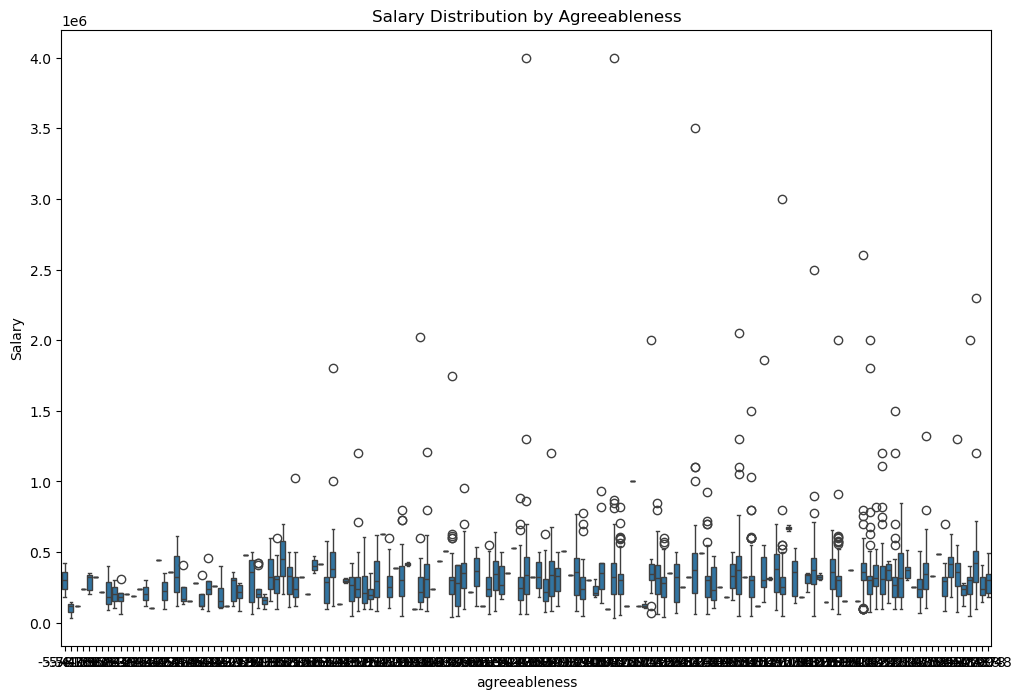

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='agreeableness', y='Salary', data=df)
plt.title('Salary Distribution by Agreeableness')
plt.show()


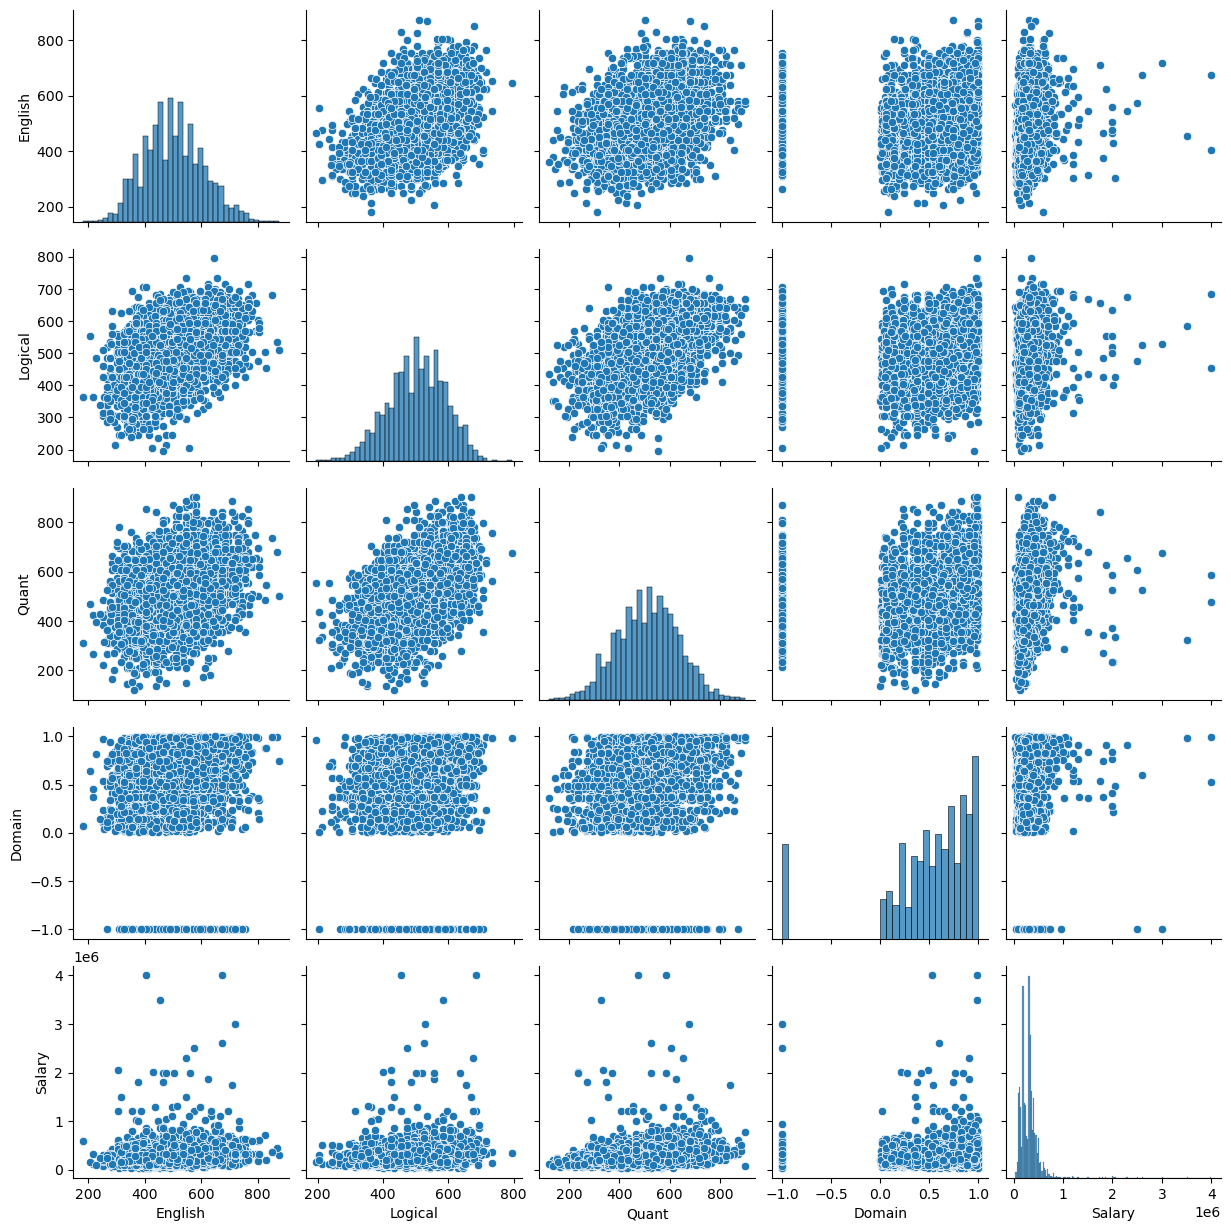

In [21]:
# Pair plot for selected columns
sns.pairplot(df[['English', 'Logical', 'Quant', 'Domain', 'Salary']], palette='Set1')
plt.show()


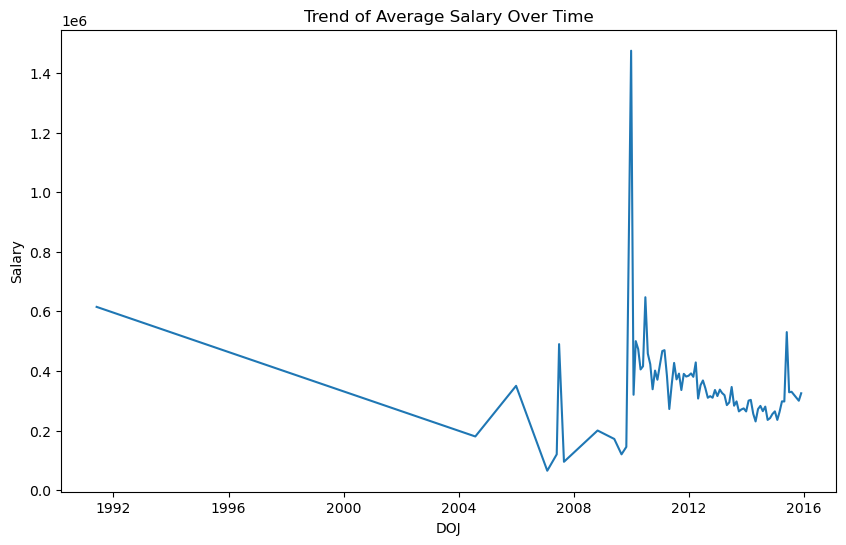

In [22]:
# Line plot for Salary over time (assuming DOJ is in datetime format)
df['DOJ'] = pd.to_datetime(df['DOJ'])
df_grouped = df.groupby('DOJ')['Salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='DOJ', y='Salary', data=df_grouped)
plt.title('Trend of Average Salary Over Time')
plt.show()


+ In the above line plot it is observered that average salaries are very high in time period of 2008 and 2012 wher compare with all other time period that is between 1992 amd 2016

# Conclusion

+ We looked at how salaries are spread out across the data and found clear differences in pay for various jobs and experience levels.

+ We checked the claim that fresh graduates in certain engineering roles earn between 2.5-3 lakhs and confirmed that this range is accurate for those roles.

+ We explored how gender relates to different specializations and noticed that men and women may choose certain fields more often than others.

+ The analysis gave us useful information about salary patterns, career choices, and possible biases that could affect these outcomes.

+ The results suggest ways to address pay differences and career choices, helping to create more fairness in these areas.